<a href="https://colab.research.google.com/github/jbonesTroy/Intro-to-Machine-Learning/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


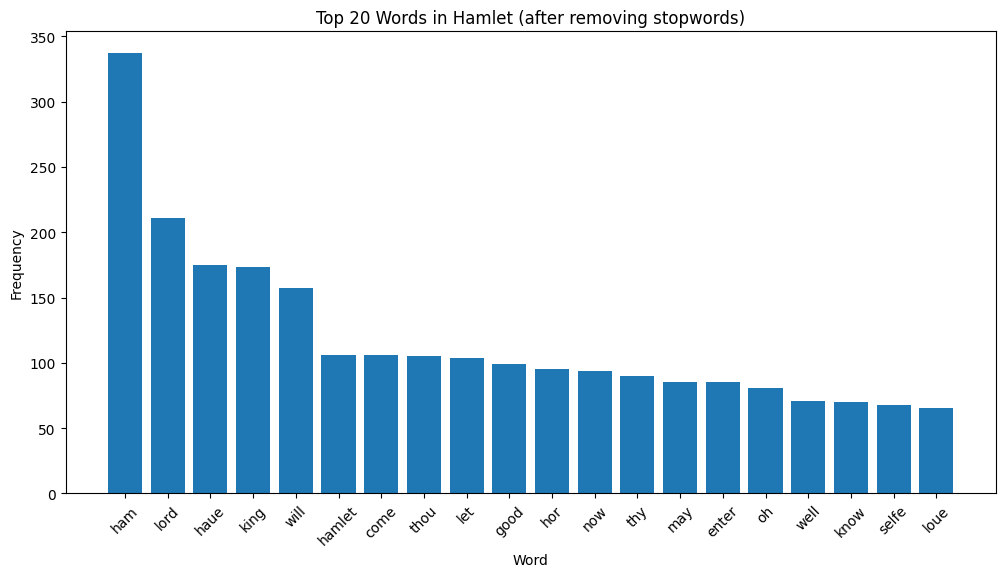

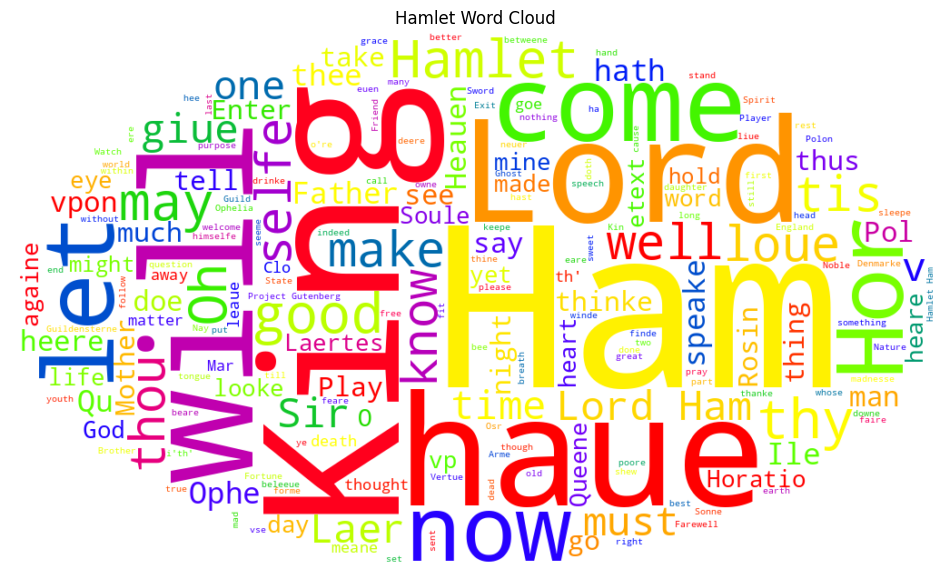

In [4]:
# Install dependencies if not already installed
!pip install requests textblob wordcloud imageio matplotlib nltk

# --- Imports ---
import nltk
from textblob import TextBlob
import requests
import imageio.v3 as iio
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# --- Download required NLTK data ---
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')   # <-- fix for MissingCorpusError

# --- Get Hamlet text from Project Gutenberg ---
target_url = 'http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

# --- Create TextBlob object ---
blob = TextBlob(data)

# --- Prepare stopwords ---
stop_words = set(STOPWORDS)

# --- Word frequency (top 20) ---
word_counts = {}
for word in blob.words:
    word_lower = word.lower()
    if word_lower not in stop_words and word_lower.isalpha():
        word_counts[word_lower] = word_counts.get(word_lower, 0) + 1

# Sort by frequency
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:20]

# --- Bar chart of top words ---
words, counts = zip(*sorted_words)
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Words in Hamlet (after removing stopwords)")
plt.ylabel("Frequency")
plt.xlabel("Word")
plt.show()

# --- Word Cloud with mask ---
image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = iio.imread(image_file)

wc = WordCloud(
    background_color="white",
    colormap="prism",
    mask=mask_image,
    stopwords=stop_words,
    width=800,
    height=400
).generate(data)

plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Hamlet Word Cloud")
plt.show()
